# Keras方法
# tf.keras 是TensorFlow的API
+ **能帮助我们快速搭建一个神经网络**

## 顺序网络结构的六步法：
1. import  
2. train, test (训练集、 测试集)
3. model = tf.keras.models.Sequential
4. model.compile  
5. model.fit  
6. model.summary  

### 3.model = tf.keras.models.Sequential ([网络结构]) # 描述各层网络 
Sequential可以想象为一个容器，这个容器里封装了网络结构。
+ 网络结构举例：
神经网络层1：  
1. 拉直层：tf.keras.layers.Flatten( ) 只做形状变化、不涉及计算  
2. 全连接层：tf.keras.layers.Dense(神经元个数, activation=激活函数, kernel_regularizer=正则化函数)  
其中：  
activation: *relu、 softmax、 sigmoid 、 tanh*  
kernel_regularizer: *tf.keras.regularizers.l1()、tf.keras.regularizers.l2()*  
3. 卷积层: tf.keras.layers.Conv2D(filters=卷积核个数, kernel_size=卷积核尺寸, strides=卷积步长, padding=" valid" or "same")
4. LSTM 层: tf.keras.layers.LSTM()

### 4.model.compile # 配置训练方法
**参数：(optimizer= 优化器, loss = 损失函数, metrics=["准确率"])**
其中：

**Optimizer:**  
"sgd" $~~~~~~$or$~~~$ tf.keras.optimizers.SGD (lr=学习率,momentum=动量参数)  
"adagrad" or$~~~$ tf.keras.optimizers.Adagrad (lr=学习率)  
"adadelta" or $~~~$tf.keras.optimizers.Adadelta (lr=学习率)  
"adam" $~~~~~$or $~~~$tf.keras.optimizers.Adam (lr=学习率, beta_1=0.9, beta_2=0.999)   

**loss:**  
"mse" $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$or $~~~$ttf.keras.losses.MeanSquaredError()  
"sparse_categorical_crossentropy" or $~~~$tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False(输出是否softmax))  

**Metrics=[ ]:告知标签的格式**  
"accuracy"：$~~~$y_和y**都是数值**，如y_=[1] y=[1]  
"categorical_accuracy"：$~~~$y_和y都是**独热码(概率分布)**，如y_=[0,1,0] y=[0.256,0.695,0.048]  
"sparse_categorical_accuracy"：$~~~$**y_是数值，y是独热码(概率分布)**,如y_=[1] y=[0.256,0.695,0.048]

### 5.model.fit # 执行训练过程
**参数：  
model.fit (   
训练集的输入特征,   
训练集的标签,  
batch_size=每组样本个数,   
epochs=迭代多少次,  
validation_data=( 测试集的输入特征，测试集的标签),  
validation_split=从训练集划分多少比例给测试集，  
validation_freq =  多少次epoch使用测试集验证一次  
）**

### 6.model.summary  # 可以打印出网络结构和参数统计
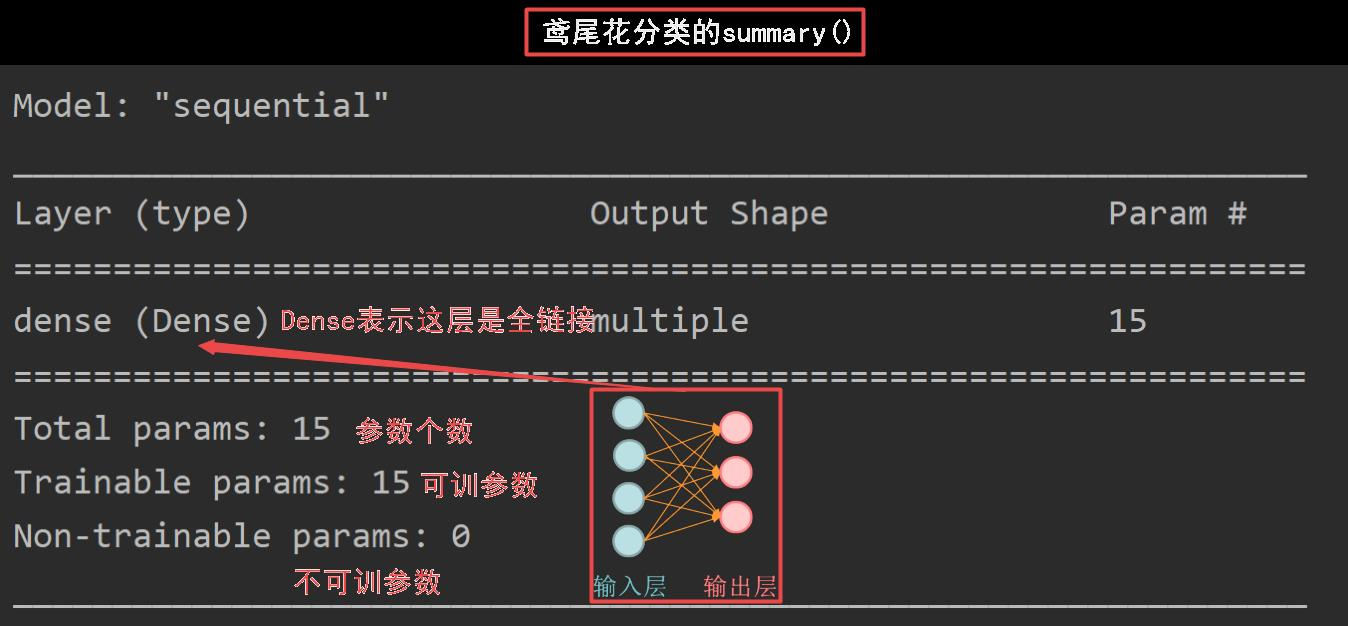

In [17]:
%matplotlib notebook
import tensorflow as tf
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt

## 一、Sequential六步法复现鸢尾花分类

In [18]:
# ************************  用Sequential六步法复现鸢尾花分类  ************************
# =============================        1.import          =============================
# =============================     2.测试集、训练集     =============================
x_train = datasets.load_iris().data
y_train = datasets.load_iris().target

np.random.seed(116)
np.random.shuffle(x_train)
np.random.seed(116)
np.random.shuffle(y_train)
tf.random.set_seed(116)
# =============================  3.Sequential 描述各层网络  ==========================
model = tf.keras.models.Sequential(
    tf.keras.layers.Dense(
        3, # 神经元个数
        activation='softmax', # 激活函数
        kernel_regularizer=tf.keras.regularizers.l2() # 正则化方法
    )
)
# =============================    4.Compile 配置训练方法   ==========================
model.compile(
    optimizer=tf.keras.optimizers.SGD(lr=0.1),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['sparse_categorical_accuracy'] # 标签是[0],[1],[2]数值，输出是[0.706,0.294,0.023]概率分布
)
# =============================      5.fit 执行训练过程     ==========================
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=500,
    # validation_data=(x_test, y_test),
    validation_split=0.2,
    validation_freq=20
)
# ==========================  6.summary 打印网络结构和参数统计  ======================
model.summary()

Train on 120 samples, validate on 30 samples
Epoch 1/500
120/120 [==============================] - 0s 910us/sample - loss: 2.1962 - sparse_categorical_accuracy: 0.3500
Epoch 2/500
120/120 [==============================] - 0s 130us/sample - loss: 0.8823 - sparse_categorical_accuracy: 0.6417
Epoch 3/500
120/120 [==============================] - 0s 0s/sample - loss: 1.0519 - sparse_categorical_accuracy: 0.6500
Epoch 4/500
120/120 [==============================] - 0s 163us/sample - loss: 0.8097 - sparse_categorical_accuracy: 0.6333
Epoch 5/500
120/120 [==============================] - 0s 67us/sample - loss: 1.0982 - sparse_categorical_accuracy: 0.6250
Epoch 6/500
120/120 [==============================] - 0s 58us/sample - loss: 0.6229 - sparse_categorical_accuracy: 0.7167
Epoch 7/500
120/120 [==============================] - 0s 50us/sample - loss: 0.9548 - sparse_categorical_accuracy: 0.6333
Epoch 8/500
120/120 [==============================] - 0s 42us/sample - loss: 0.5668 - sparse

120/120 [==============================] - 0s 58us/sample - loss: 0.4211 - sparse_categorical_accuracy: 0.8667
Epoch 66/500
120/120 [==============================] - 0s 33us/sample - loss: 0.3679 - sparse_categorical_accuracy: 0.9417
Epoch 67/500
120/120 [==============================] - 0s 42us/sample - loss: 0.4784 - sparse_categorical_accuracy: 0.7833
Epoch 68/500
120/120 [==============================] - 0s 42us/sample - loss: 0.6290 - sparse_categorical_accuracy: 0.6750
Epoch 69/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3813 - sparse_categorical_accuracy: 0.9500
Epoch 70/500
120/120 [==============================] - 0s 33us/sample - loss: 0.3755 - sparse_categorical_accuracy: 0.9250
Epoch 71/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3886 - sparse_categorical_accuracy: 0.9167
Epoch 72/500
120/120 [==============================] - 0s 50us/sample - loss: 0.4446 - sparse_categorical_accuracy: 0.8167
Epoch 73/500
120/120 

120/120 [==============================] - 0s 50us/sample - loss: 0.3534 - sparse_categorical_accuracy: 0.9583
Epoch 130/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3624 - sparse_categorical_accuracy: 0.9417
Epoch 131/500
120/120 [==============================] - 0s 50us/sample - loss: 0.3767 - sparse_categorical_accuracy: 0.9083
Epoch 132/500
120/120 [==============================] - 0s 42us/sample - loss: 0.4185 - sparse_categorical_accuracy: 0.8750
Epoch 133/500
120/120 [==============================] - 0s 33us/sample - loss: 0.3814 - sparse_categorical_accuracy: 0.9167
Epoch 134/500
120/120 [==============================] - 0s 42us/sample - loss: 0.4230 - sparse_categorical_accuracy: 0.8917
Epoch 135/500
120/120 [==============================] - 0s 33us/sample - loss: 0.3636 - sparse_categorical_accuracy: 0.9500
Epoch 136/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3685 - sparse_categorical_accuracy: 0.9333
Epoch 137/500


120/120 [==============================] - 0s 42us/sample - loss: 0.3965 - sparse_categorical_accuracy: 0.8917
Epoch 193/500
120/120 [==============================] - 0s 42us/sample - loss: 0.4040 - sparse_categorical_accuracy: 0.8917
Epoch 194/500
120/120 [==============================] - 0s 50us/sample - loss: 0.3535 - sparse_categorical_accuracy: 0.9333
Epoch 195/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3798 - sparse_categorical_accuracy: 0.9417
Epoch 196/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3599 - sparse_categorical_accuracy: 0.9250
Epoch 197/500
120/120 [==============================] - 0s 50us/sample - loss: 0.3632 - sparse_categorical_accuracy: 0.9333
Epoch 198/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3789 - sparse_categorical_accuracy: 0.9250
Epoch 199/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3995 - sparse_categorical_accuracy: 0.8750
Epoch 200/500


120/120 [==============================] - 0s 42us/sample - loss: 0.4077 - sparse_categorical_accuracy: 0.8833
Epoch 256/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3796 - sparse_categorical_accuracy: 0.9167
Epoch 257/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3603 - sparse_categorical_accuracy: 0.9583
Epoch 258/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3593 - sparse_categorical_accuracy: 0.9583
Epoch 259/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3550 - sparse_categorical_accuracy: 0.9500
Epoch 260/500
120/120 [==============================] - 0s 75us/sample - loss: 0.3702 - sparse_categorical_accuracy: 0.9333 - val_loss: 0.3728 - val_sparse_categorical_accuracy: 1.0000
Epoch 261/500
120/120 [==============================] - 0s 50us/sample - loss: 0.3443 - sparse_categorical_accuracy: 0.9583
Epoch 262/500
120/120 [==============================] - 0s 42us/sample - loss

120/120 [==============================] - 0s 42us/sample - loss: 0.3643 - sparse_categorical_accuracy: 0.9333
Epoch 320/500
120/120 [==============================] - 0s 83us/sample - loss: 0.3563 - sparse_categorical_accuracy: 0.9500 - val_loss: 0.6103 - val_sparse_categorical_accuracy: 0.6000
Epoch 321/500
120/120 [==============================] - 0s 58us/sample - loss: 0.3852 - sparse_categorical_accuracy: 0.9167
Epoch 322/500
120/120 [==============================] - 0s 50us/sample - loss: 0.3413 - sparse_categorical_accuracy: 0.9667
Epoch 323/500
120/120 [==============================] - 0s 58us/sample - loss: 0.3346 - sparse_categorical_accuracy: 0.9250
Epoch 324/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3535 - sparse_categorical_accuracy: 0.9417
Epoch 325/500
120/120 [==============================] - 0s 58us/sample - loss: 0.3591 - sparse_categorical_accuracy: 0.9583
Epoch 326/500
120/120 [==============================] - 0s 42us/sample - loss

120/120 [==============================] - 0s 42us/sample - loss: 0.3427 - sparse_categorical_accuracy: 0.9583
Epoch 383/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3512 - sparse_categorical_accuracy: 0.9333
Epoch 384/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3712 - sparse_categorical_accuracy: 0.9083
Epoch 385/500
120/120 [==============================] - 0s 33us/sample - loss: 0.3541 - sparse_categorical_accuracy: 0.9500
Epoch 386/500
120/120 [==============================] - 0s 33us/sample - loss: 0.4142 - sparse_categorical_accuracy: 0.8833
Epoch 387/500
120/120 [==============================] - 0s 50us/sample - loss: 0.3379 - sparse_categorical_accuracy: 0.9667
Epoch 388/500
120/120 [==============================] - 0s 50us/sample - loss: 0.3353 - sparse_categorical_accuracy: 0.9667
Epoch 389/500
120/120 [==============================] - 0s 33us/sample - loss: 0.3579 - sparse_categorical_accuracy: 0.9417
Epoch 390/500


120/120 [==============================] - 0s 42us/sample - loss: 0.3463 - sparse_categorical_accuracy: 0.9333
Epoch 447/500
120/120 [==============================] - 0s 50us/sample - loss: 0.4087 - sparse_categorical_accuracy: 0.9000
Epoch 448/500
120/120 [==============================] - 0s 50us/sample - loss: 0.3768 - sparse_categorical_accuracy: 0.9250
Epoch 449/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3658 - sparse_categorical_accuracy: 0.9583
Epoch 450/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3906 - sparse_categorical_accuracy: 0.9167
Epoch 451/500
120/120 [==============================] - 0s 67us/sample - loss: 0.3470 - sparse_categorical_accuracy: 0.9417
Epoch 452/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3467 - sparse_categorical_accuracy: 0.9583
Epoch 453/500
120/120 [==============================] - 0s 50us/sample - loss: 0.3642 - sparse_categorical_accuracy: 0.9083
Epoch 454/500


## 非顺序（跳连）网络结构的六步法：
1. import  
2. train, test (训练集、 测试集)
3. class MyModel(Model)$~~~~$model=MyModel
4. model.compile  
5. model.fit  
6. model.summary  


### 3.class MyModel(Model)   # 用"类"描述网络结构
+ **\_\_init\_\_() $~~~~$搭建积木**
+ **$~~~~$call() $~~~~$调用积木**

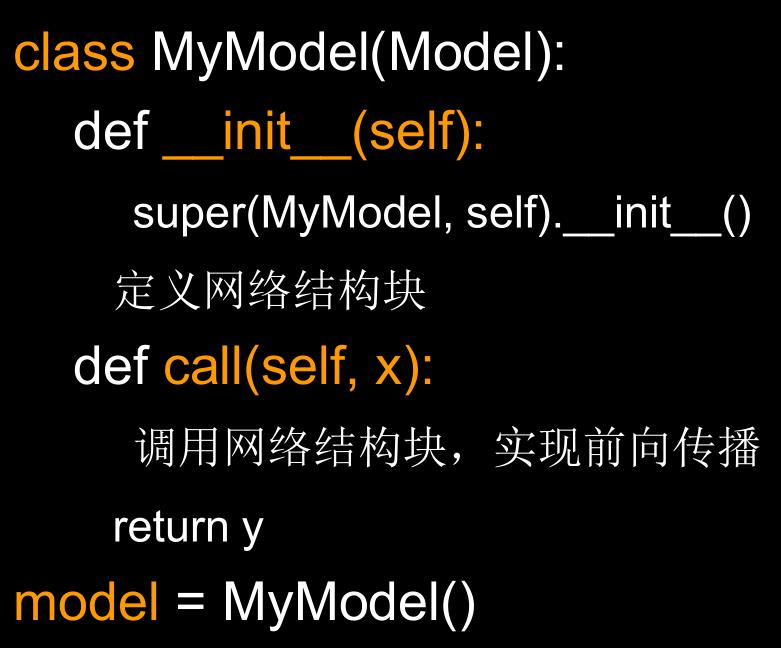

## 二、用class MyModel六步法复现鸢尾花分类

In [19]:
# *********************  用class MyModel六步法复现鸢尾花分类  ************************
# =============================        1.import          =============================
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
# =============================     2.测试集、训练集     =============================
x_train = datasets.load_iris().data
y_train = datasets.load_iris().target

np.random.seed(116)
np.random.shuffle(x_train)
np.random.seed(116)
np.random.shuffle(y_train)
tf.random.set_seed(116)
# ========================   3.class MyModel 用"类"描述网络结构  =====================
class IrisModel(Model):
    def __init__(self):
        super(IrisModel, self).__init__()
        self.d1 = Dense( # d1是给这一层起的名字
            3, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2()
        )
    def call(self, x):
        y=self.d1(x)
        return y
model = IrisModel()
# =============================    4.Compile 配置训练方法   ==========================
model.compile(
    optimizer=tf.keras.optimizers.SGD(lr=0.1),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['sparse_categorical_accuracy'] # 标签是[0],[1],[2]数值，输出是[0.706,0.294,0.023]概率分布
)
# =============================      5.fit 执行训练过程     ==========================
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=500,
    # validation_data=(x_test, y_test),
    validation_split=0.2,
    validation_freq=20
)
# ==========================  6.summary 打印网络结构和参数统计  ======================
model.summary()

Train on 120 samples, validate on 30 samples
Epoch 1/500
120/120 [==============================] - 0s 902us/sample - loss: 2.1962 - sparse_categorical_accuracy: 0.3500
Epoch 2/500
120/120 [==============================] - 0s 130us/sample - loss: 0.8823 - sparse_categorical_accuracy: 0.6417
Epoch 3/500
120/120 [==============================] - 0s 0s/sample - loss: 1.0519 - sparse_categorical_accuracy: 0.6500
Epoch 4/500
120/120 [==============================] - 0s 130us/sample - loss: 0.8097 - sparse_categorical_accuracy: 0.6333
Epoch 5/500
120/120 [==============================] - 0s 42us/sample - loss: 1.0982 - sparse_categorical_accuracy: 0.6250
Epoch 6/500
120/120 [==============================] - 0s 67us/sample - loss: 0.6229 - sparse_categorical_accuracy: 0.7167
Epoch 7/500
120/120 [==============================] - 0s 58us/sample - loss: 0.9548 - sparse_categorical_accuracy: 0.6333
Epoch 8/500
120/120 [==============================] - 0s 58us/sample - loss: 0.5668 - sparse

120/120 [==============================] - 0s 42us/sample - loss: 0.4211 - sparse_categorical_accuracy: 0.8667
Epoch 66/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3679 - sparse_categorical_accuracy: 0.9417
Epoch 67/500
120/120 [==============================] - 0s 42us/sample - loss: 0.4784 - sparse_categorical_accuracy: 0.7833
Epoch 68/500
120/120 [==============================] - 0s 50us/sample - loss: 0.6290 - sparse_categorical_accuracy: 0.6750
Epoch 69/500
120/120 [==============================] - 0s 50us/sample - loss: 0.3813 - sparse_categorical_accuracy: 0.9500
Epoch 70/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3755 - sparse_categorical_accuracy: 0.9250
Epoch 71/500
120/120 [==============================] - 0s 33us/sample - loss: 0.3886 - sparse_categorical_accuracy: 0.9167
Epoch 72/500
120/120 [==============================] - 0s 42us/sample - loss: 0.4446 - sparse_categorical_accuracy: 0.8167
Epoch 73/500
120/120 

120/120 [==============================] - 0s 42us/sample - loss: 0.3534 - sparse_categorical_accuracy: 0.9583
Epoch 130/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3624 - sparse_categorical_accuracy: 0.9417
Epoch 131/500
120/120 [==============================] - 0s 50us/sample - loss: 0.3767 - sparse_categorical_accuracy: 0.9083
Epoch 132/500
120/120 [==============================] - 0s 42us/sample - loss: 0.4185 - sparse_categorical_accuracy: 0.8750
Epoch 133/500
120/120 [==============================] - 0s 33us/sample - loss: 0.3814 - sparse_categorical_accuracy: 0.9167
Epoch 134/500
120/120 [==============================] - 0s 42us/sample - loss: 0.4230 - sparse_categorical_accuracy: 0.8917
Epoch 135/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3636 - sparse_categorical_accuracy: 0.9500
Epoch 136/500
120/120 [==============================] - 0s 33us/sample - loss: 0.3685 - sparse_categorical_accuracy: 0.9333
Epoch 137/500


120/120 [==============================] - 0s 42us/sample - loss: 0.4040 - sparse_categorical_accuracy: 0.8917
Epoch 194/500
120/120 [==============================] - 0s 58us/sample - loss: 0.3535 - sparse_categorical_accuracy: 0.9333
Epoch 195/500
120/120 [==============================] - 0s 50us/sample - loss: 0.3798 - sparse_categorical_accuracy: 0.9417
Epoch 196/500
120/120 [==============================] - 0s 50us/sample - loss: 0.3599 - sparse_categorical_accuracy: 0.9250
Epoch 197/500
120/120 [==============================] - 0s 50us/sample - loss: 0.3632 - sparse_categorical_accuracy: 0.9333
Epoch 198/500
120/120 [==============================] - 0s 50us/sample - loss: 0.3789 - sparse_categorical_accuracy: 0.9250
Epoch 199/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3995 - sparse_categorical_accuracy: 0.8750
Epoch 200/500
120/120 [==============================] - 0s 83us/sample - loss: 0.3566 - sparse_categorical_accuracy: 0.9333 - val_loss: 0.

120/120 [==============================] - 0s 42us/sample - loss: 0.3603 - sparse_categorical_accuracy: 0.9583
Epoch 258/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3593 - sparse_categorical_accuracy: 0.9583
Epoch 259/500
120/120 [==============================] - 0s 50us/sample - loss: 0.3550 - sparse_categorical_accuracy: 0.9500
Epoch 260/500
120/120 [==============================] - 0s 67us/sample - loss: 0.3702 - sparse_categorical_accuracy: 0.9333 - val_loss: 0.3728 - val_sparse_categorical_accuracy: 1.0000
Epoch 261/500
120/120 [==============================] - 0s 50us/sample - loss: 0.3443 - sparse_categorical_accuracy: 0.9583
Epoch 262/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3642 - sparse_categorical_accuracy: 0.9417
Epoch 263/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3592 - sparse_categorical_accuracy: 0.9417
Epoch 264/500
120/120 [==============================] - 0s 33us/sample - loss

Epoch 321/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3852 - sparse_categorical_accuracy: 0.9167
Epoch 322/500
120/120 [==============================] - 0s 33us/sample - loss: 0.3413 - sparse_categorical_accuracy: 0.9667
Epoch 323/500
120/120 [==============================] - 0s 50us/sample - loss: 0.3346 - sparse_categorical_accuracy: 0.9250
Epoch 324/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3535 - sparse_categorical_accuracy: 0.9417
Epoch 325/500
120/120 [==============================] - 0s 50us/sample - loss: 0.3591 - sparse_categorical_accuracy: 0.9583
Epoch 326/500
120/120 [==============================] - 0s 58us/sample - loss: 0.3533 - sparse_categorical_accuracy: 0.9250
Epoch 327/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3399 - sparse_categorical_accuracy: 0.9667
Epoch 328/500
120/120 [==============================] - 0s 50us/sample - loss: 0.4023 - sparse_categorical_accuracy: 0.9000


120/120 [==============================] - 0s 42us/sample - loss: 0.3541 - sparse_categorical_accuracy: 0.9500
Epoch 386/500
120/120 [==============================] - 0s 42us/sample - loss: 0.4142 - sparse_categorical_accuracy: 0.8833
Epoch 387/500
120/120 [==============================] - 0s 50us/sample - loss: 0.3379 - sparse_categorical_accuracy: 0.9667
Epoch 388/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3353 - sparse_categorical_accuracy: 0.9667
Epoch 389/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3579 - sparse_categorical_accuracy: 0.9417
Epoch 390/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3770 - sparse_categorical_accuracy: 0.9167
Epoch 391/500
120/120 [==============================] - 0s 50us/sample - loss: 0.3374 - sparse_categorical_accuracy: 0.9750
Epoch 392/500
120/120 [==============================] - 0s 33us/sample - loss: 0.3372 - sparse_categorical_accuracy: 0.9667
Epoch 393/500


120/120 [==============================] - 0s 42us/sample - loss: 0.3658 - sparse_categorical_accuracy: 0.9583
Epoch 450/500
120/120 [==============================] - 0s 33us/sample - loss: 0.3906 - sparse_categorical_accuracy: 0.9167
Epoch 451/500
120/120 [==============================] - 0s 50us/sample - loss: 0.3470 - sparse_categorical_accuracy: 0.9417
Epoch 452/500
120/120 [==============================] - 0s 33us/sample - loss: 0.3467 - sparse_categorical_accuracy: 0.9583
Epoch 453/500
120/120 [==============================] - 0s 33us/sample - loss: 0.3642 - sparse_categorical_accuracy: 0.9083
Epoch 454/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3548 - sparse_categorical_accuracy: 0.9500
Epoch 455/500
120/120 [==============================] - 0s 33us/sample - loss: 0.3693 - sparse_categorical_accuracy: 0.9167
Epoch 456/500
120/120 [==============================] - 0s 42us/sample - loss: 0.3876 - sparse_categorical_accuracy: 0.9083
Epoch 457/500


# MNIST数据集
MNIST 数据集来自美国国家标准与技术研究所, National Institute of Standards and Technology (NIST). 训练集 (training set) 由来自 250 个不同人手写的数字构成, 其中 50% 是高中学生, 50% 来自人口普查局 (the Census Bureau) 的工作人员. 测试集(test set) 也是同样比例的手写数字数据。  

MNIST 数据集可在 <http://yann.lecun.com/exdb/mnist/> 获取, 它包含了四个部分:
+ Training set images: train-images-idx3-ubyte.gz (9.9 MB, 解压后 47 MB, 包含 60,000 个样本)
+ Training set labels: train-labels-idx1-ubyte.gz (29 KB, 解压后 60 KB, 包含 60,000 个标签)
+ Test set images: t10k-images-idx3-ubyte.gz (1.6 MB, 解压后 7.8 MB, 包含 10,000 个样本)
+ Test set labels: t10k-labels-idx1-ubyte.gz (5KB, 解压后 10 KB, 包含 10,000 个标签)

In [30]:
# 导入MNIST数据
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

<IPython.core.display.Javascript object>


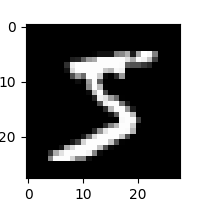

训练集 - 第一个元素 - 标签:   5


In [31]:
plt.figure('训练集 - 第一个元素 - 输入特征', figsize=(2,2))
plt.imshow(x_train[0], cmap='gray')  # 绘制灰度图
plt.show()

print("训练集 - 第一个元素 - 标签:  ", y_train[0])

In [22]:
print("训练集 - 所有输入特征 - 形状:  ", x_train.shape)
print("测试集 - 所有输入特征 - 形状:  ", x_test.shape)
print("训练集 - 所有标签 - 形状： ", y_train.shape)
print("测试集 - 所有标签 - 形状： ", y_test.shape)

训练集 - 所有输入特征 - 形状:   (60000, 28, 28)
测试集 - 所有输入特征 - 形状:   (10000, 28, 28)
训练集 - 所有标签 - 形状：  (60000,)
测试集 - 所有标签 - 形状：  (10000,)


## 三、用"Sequential六步法"实现手写数字识别

In [23]:
# *******************     用"Sequential六步法"实现手写数字识别     *******************
# =============================        1.import          =============================
# =============================     2.测试集、训练集     =============================
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data() # 导入数据
x_train, x_test = x_train/255.0, x_test/255.0  # 0-255灰度值→归"1"化 | 数值小，更适合神经网络吸收
# =============================  3.Sequential 描述各层网络  ==========================
model = tf.keras.models.Sequential(
    [   
        tf.keras.layers.Flatten(),                     # ①.拉直层  28 * 28 → 784
        tf.keras.layers.Dense(128, activation='relu'), # ②.全链接层
        tf.keras.layers.Dense(10,activation='softmax') # ③.全链接层"0-9共10个神经元"
    ]
)
# =============================    4.Compile 配置训练方法   ==========================
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['sparse_categorical_accuracy'] # 标签是0-9数值，输出是[0.706,0.294,0.023]分布
)
# =============================      5.fit 执行训练过程     ==========================
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=5,
    validation_data=(x_test, y_test),
    # validation_split=0.2,
    validation_freq=1
)
# ==========================  6.summary 打印网络结构和参数统计  ======================
model.summary()

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2544 - sparse_categorical_accuracy: 0.9272 - val_loss: 0.1333 - val_sparse_categorical_accuracy: 0.9599
Epoch 2/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1120 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0903 - val_sparse_categorical_accuracy: 0.9722
Epoch 3/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0769 - sparse_categorical_accuracy: 0.9768 - val_loss: 0.0962 - val_sparse_categorical_accuracy: 0.9720
Epoch 4/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0569 - sparse_categorical_accuracy: 0.9828 - val_loss: 0.0859 - val_sparse_categorical_accuracy: 0.9737
Epoch 5/5
60000/60000 [==============================] - 2s 42us/sample - loss: 0.0441 - sparse_categorical_accuracy: 0.9868 - val_loss: 0.0722 - val_sparse_categorical_accuracy: 0.9780
Model: "sequential_5

## 四、用"Class六步法"实现手写数字识别

In [24]:
# *********************     用"Class六步法"实现手写数字识别     **********************
# =============================        1.import          =============================
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten
# =============================     2.测试集、训练集     =============================
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data() # 导入数据
x_train, x_test = x_train/255.0, x_test/255.0  # 0-255灰度值→归"1"化 | 数值小，更适合神经网络吸收
# ===========================  3.Class MyModel描述各层网络  ==========================
class MnistModel(Model):
    def __init__(self):
        super(MnistModel, self).__init__()
        self.flatten = Flatten()                 # ①.拉直层  28 * 28 → 784
        self.d1 = Dense(128, activation='relu')  # ②.全链接层
        self.d2 = Dense(10,activation='softmax') # ③.全链接层"0-9共10个神经元"
    def call(self, x):
        t = self.flatten(x)
        t = self.d1(t)
        y = self.d2(t)
        return y
model = MnistModel()
# =============================    4.Compile 配置训练方法   ==========================
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['sparse_categorical_accuracy'] # 标签是0-9数值，输出是[0.706,0.294,0.023]分布
)
# =============================      5.fit 执行训练过程     ==========================
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=5,
    validation_data=(x_test, y_test),
    # validation_split=0.2,
    validation_freq=1
)
# ==========================  6.summary 打印网络结构和参数统计  ======================
model.summary()

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2598 - sparse_categorical_accuracy: 0.9253 - val_loss: 0.1344 - val_sparse_categorical_accuracy: 0.9603
Epoch 2/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.1121 - sparse_categorical_accuracy: 0.9664 - val_loss: 0.0942 - val_sparse_categorical_accuracy: 0.9713
Epoch 3/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0777 - sparse_categorical_accuracy: 0.9768 - val_loss: 0.0900 - val_sparse_categorical_accuracy: 0.9731
Epoch 4/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0577 - sparse_categorical_accuracy: 0.9830 - val_loss: 0.0833 - val_sparse_categorical_accuracy: 0.9739
Epoch 5/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0454 - sparse_categorical_accuracy: 0.9861 - val_loss: 0.0757 - val_sparse_categorical_accuracy: 0.9768
Model: "mnist_model_

# Fashion数据集
Fashion-MNIST数据集包含了10个类别的图像，分别是：0:t-shirt（T恤），1:trouser（牛仔裤），
2:pullover（套衫），3:dress（裙子），4:coat（外套），5:sandal（凉鞋），6:shirt（衬衫），
7:sneaker（运动鞋），8:bag（包），9：ankle boot（短靴）。  
Fashion-MNIST和mnist数据集非常相似，都是60000训练、10000测试，图片也都是28*28。
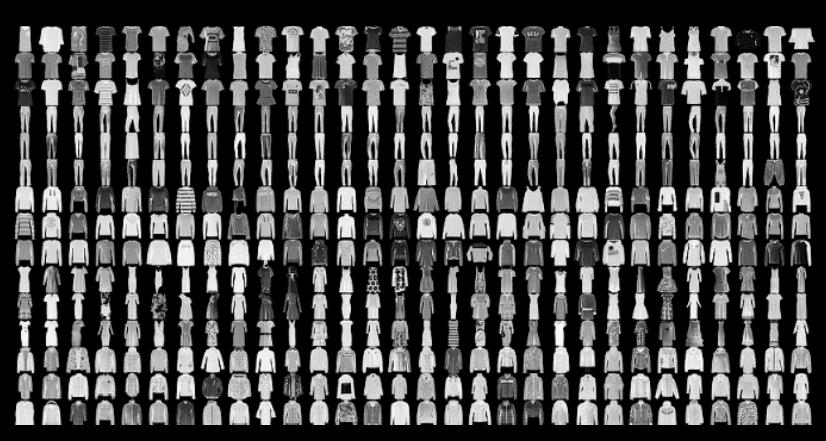

In [25]:
# 导入MNIST数据
fashion = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion.load_data()

<IPython.core.display.Javascript object>


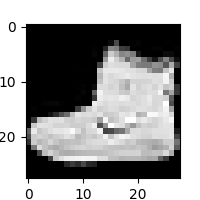

fashion训练集 - 第一个元素 - 标签:   9


In [26]:
plt.figure('fashion训练集 - 第一个元素 - 输入特征', figsize=(2,2))
# plt.imshow(x_train[0])  # 绘制彩色图
plt.imshow(x_train[0], cmap='gray')  # 绘制灰度图
plt.show()

print("fashion训练集 - 第一个元素 - 标签:  ", y_train[0])

In [27]:
print("训练集 - 所有输入特征 - 形状:  ", x_train.shape)
print("测试集 - 所有输入特征 - 形状:  ", x_test.shape)
print("训练集 - 所有标签 - 形状： ", y_train.shape)
print("测试集 - 所有标签 - 形状： ", y_test.shape)

训练集 - 所有输入特征 - 形状:   (60000, 28, 28)
测试集 - 所有输入特征 - 形状:   (10000, 28, 28)
训练集 - 所有标签 - 形状：  (60000,)
测试集 - 所有标签 - 形状：  (10000,)


## 五、用"Sequential六步法"实现鞋服识别

In [28]:
# *********************     用"Sequential六步法"实现鞋服识别     *********************
# =============================        1.import          =============================
# =============================     2.测试集、训练集     =============================
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
# =============================  3.Sequential 描述各层网络  ==========================
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)
# =============================    4.Compile 配置训练方法   ==========================
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['sparse_categorical_accuracy']
)
# =============================      5.fit 执行训练过程     ==========================
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=5,
    validation_data=(x_test, y_test),
    validation_freq=1
)
# ==========================  6.summary 打印网络结构和参数统计  ======================
model.summary()

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.5017 - sparse_categorical_accuracy: 0.8230 - val_loss: 0.4468 - val_sparse_categorical_accuracy: 0.8440
Epoch 2/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3783 - sparse_categorical_accuracy: 0.8636 - val_loss: 0.3920 - val_sparse_categorical_accuracy: 0.8611
Epoch 3/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3410 - sparse_categorical_accuracy: 0.8756 - val_loss: 0.3626 - val_sparse_categorical_accuracy: 0.8668
Epoch 4/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3141 - sparse_categorical_accuracy: 0.8850 - val_loss: 0.3616 - val_sparse_categorical_accuracy: 0.8726
Epoch 5/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2950 - sparse_categorical_accuracy: 0.8909 - val_loss: 0.3635 - val_sparse_categorical_accuracy: 0.8708
Model: "sequential_6

## 六、用"Class六步法"实现鞋服识别

In [29]:
# ********************     用"Class MyModel六步法"实现鞋服识别     *******************
# =============================        1.import          =============================
from tensorflow.keras import Model
from tensorflow.keras.layers import Flatten,Dense
# =============================     2.测试集、训练集     =============================
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
# ===========================  3.Class MyModel描述各层网络  ==========================
class FashionModel(Model):
    def __init__(self):
        super(FashionModel, self).__init__()
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10, activation='softmax')
    def call(self, x):
        t = self.flatten(x)
        t = self.d1(t)
        y = self.d2(t)
        return y
model = FashionModel()
# =============================    4.Compile 配置训练方法   ==========================
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['sparse_categorical_accuracy']
)
# =============================      5.fit 执行训练过程     ==========================
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=5,
    validation_data=(x_test, y_test),
    validation_freq=1
)
# ==========================  6.summary 打印网络结构和参数统计  ======================
model.summary()

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.5068 - sparse_categorical_accuracy: 0.8223 - val_loss: 0.4542 - val_sparse_categorical_accuracy: 0.8386
Epoch 2/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3812 - sparse_categorical_accuracy: 0.8628 - val_loss: 0.3837 - val_sparse_categorical_accuracy: 0.8608
Epoch 3/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3417 - sparse_categorical_accuracy: 0.8761 - val_loss: 0.3680 - val_sparse_categorical_accuracy: 0.8652
Epoch 4/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3156 - sparse_categorical_accuracy: 0.8843 - val_loss: 0.3548 - val_sparse_categorical_accuracy: 0.8716
Epoch 5/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2969 - sparse_categorical_accuracy: 0.8900 - val_loss: 0.3659 - val_sparse_categorical_accuracy: 0.8684
Model: "fashion_mode